# Dataset: Características de autos

## Introducción 

**Objetivo:** Construir un modelo de machine learning que prediga el precio de autos de distintas características. 

**Contexto comercial:** Un comprador y vendedor de autos actualmente realiza compras y ventas de autos a un precio en base a la experiencia. Es por este motivo, que en ocasiones pierde dinero en estas transacciones debido a la falta de conocimiento del mercado. Para solucionar este inconveniente, se contrató a un data scientist para obtener una buena estimación del precio de los coches que compra y comercializa y así obtener mayores ganancias.

**Problema comercial:** El data scientist deberá crear un modelo que permita estimar el precio de los autos y poder conocer las características más importantes.

**Contexto analítico:** Se investigó en una fuente confiable y se encontró un archivo CSV (car_price.csv) sobre autos en donde se informa el precio junto a otras características de los mismos. Dado que aparece el precio en el conjunto de datos, los datos se encuentran etiquetados por lo que se puede usar un modelo de regresión para resolver este problema de aprendizaje supervisado.

## Dataset

El dataset contiene datos sobre distintos atributos de autos. En particular, la característica de interés en el precio de los mismos. La idea del análisis es poder entender y determinar las relaciones entre el atributo de interés y las demás características. Por lo tanto, hay que separar las variables en numéricas, categóricas y de alta cardinalidad.

#### Variables de alta cardinalidad:

* ID: Número de identificación 

#### Variables numéricas:

* Price: Precio 
* Levy: Impuesto a la importación y exportación 
* Prod. year: Año de fabricación
* Engine volume: Volumen del motor
* Mileage: Kilometraje
* Cylinders: Cantidad de cilindros (Aclaración: Esta variable se considerada como numérica aunque es factible tratarla como categórica dado que se trata de valores numéricos enteros)
* Airbags: Cantidad de airbags/bolsas de aire (Aclaración: Esta variable se considerada como numérica aunque es factible tratarla como categórica dado que se trata de valores numéricos enteros)

#### Variables categóricas:

* Manufacturer: Fabricante
* Model: Modelo
* Category: Categoría 
* Leather interior: Interior de cuero
* Fuel type: Tipo de combustible
* Gear box type: Tipo de caja de cambios
* Drive wheels: Ruedas motrices
* Doors: Cantidad de puertas (Aclaración: Esta variable se considerada como categórica a pesar de estar definida con números ya que no tiene sentido realizar la suma, la resta o el promedio en esta)
* Wheel: Lado en el que se encuentra el volante
* Color: Color

## Preguntas e hipótesis

#### Pregunta 1:

Que tipo de distribución sigue la variable de interés (Price)

#### Pregunta 2:

Existe relación lineal entre la variable "Price" y las variables "Levy", "Prod. year", "Engine volume", "Cylinders", "Mileage" y "Airbags"

#### Pregunta 3:

Cuales son los 10 fabricantes con autos más caros y cuales son los 10 fabricantes con autos más baratos

#### Pregunta 4:

Cual es el precio de los autos según su tipo y que tipo de auto es el más frecuente

#### Pregunta 5:

Como es la distribución de precios según el tipo de combustible que tiene cada auto

#### Pregunta 6:

Como afecta las ruedas motrices y el tipo de caja de cambios al precio

#### Hipótesis 1:

Hay más autos con interior de cuero y a su vez, tienen una media mayor en el precio

#### Hipótesis 2:

Al aumentar la cantidad de puertas el precio de los autos aumenta y también, la cantidad de puertas en los autos con mayor frecuencia es 4

#### Hipótesis 3:

El color del auto no modifica el precio de los mismos

#### Hipótesis 4:

El precio de los autos aumenta mientras más nuevo sea (mayor año de producción)

## Importación de paquetes

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from sklearn.preprocessing import LabelEncoder

## Carga del dataset

In [3]:
autos = pd.read_csv('car_price.csv') # Carga el dataset
autos

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [4]:
autos.shape # Se muestra el tamaño del dataset

(19237, 18)

El dataset sin limpieza cuenta con 18 columnas y 19237 filas.

## Descarga de datos de API pública

In [5]:
url = 'https://vpic.nhtsa.dot.gov/api/vehicles/getallmakes?format=json' # URL de la API

In [6]:
response = requests.get(url) # Obtiene los datos de la API
print(response) # Imprime si la conexión fue exitosa (200)

<Response [200]>


In [7]:
texto = response.text # Transforma los datos a tipo texto
jsondata = json.loads(texto) # Transforma los datos a un archivo tipo JSON
jsondata # Muestra los datos según el archivo JSON

{'Count': 10693,
 'Message': 'Response returned successfully',
 'SearchCriteria': None,
 'Results': [{'Make_ID': 11897, 'Make_Name': ' MID-TOWN TRAILERS'},
  {'Make_ID': 4877, 'Make_Name': '1/OFF KUSTOMS, LLC'},
  {'Make_ID': 11257, 'Make_Name': '102 IRONWORKS, INC.'},
  {'Make_ID': 6387, 'Make_Name': '17 CREEK ENTERPRISES'},
  {'Make_ID': 9172, 'Make_Name': '1M CUSTOM CAR TRANSPORTS, INC.'},
  {'Make_ID': 6124, 'Make_Name': '1ST CHOICE MANUFACTURING INC'},
  {'Make_ID': 6488, 'Make_Name': '2-G TRAILER CO LLC'},
  {'Make_ID': 612, 'Make_Name': '2231545 ONTARIO'},
  {'Make_ID': 11399, 'Make_Name': '24/7 ONSITE CAMERAS INC'},
  {'Make_ID': 608, 'Make_Name': '280 TRAILERS'},
  {'Make_ID': 10123, 'Make_Name': '3 CUSTOM SOLUTIONS'},
  {'Make_ID': 11253, 'Make_Name': '3 STAR MFG LTD'},
  {'Make_ID': 8792, 'Make_Name': '3&1 ENTERPRISES, LLC DBA IMPACT TRAILERS'},
  {'Make_ID': 7388, 'Make_Name': '33 EAST MAINTENANCE INC'},
  {'Make_ID': 10005, 'Make_Name': '357 GOLF CARTS'},
  {'Make_ID': 115

In [8]:
api = pd.json_normalize(jsondata, record_path=['Results']) # Genera un dataset con el fabricante y su ID
api

,Make_ID,Make_Name
0,11897,MID-TOWN TRAILERS
1,4877,"1/OFF KUSTOMS, LLC"
2,11257,"102 IRONWORKS, INC."
3,6387,17 CREEK ENTERPRISES
4,9172,"1M CUSTOM CAR TRANSPORTS, INC."
...,...,...
10688,11035,ZTM
10689,3881,ZTPOWERSTATION
10690,3880,ZZ TRAILER
10691,8416,ZZ TRAILERS


## Merge entre dataset y API

En primer lugar, se va a modificar el nombre de las columnas del dataset generado a partir de la API. Luego, se realiza la unión entre los dos datasets generando uno nuevo.

In [9]:
api2 = api.rename(columns={'Make_ID':'Manufacturer ID','Make_Name':'Manufacturer'}) # Cambia el nombre de las columnas
api2

,Manufacturer ID,Manufacturer
0,11897,MID-TOWN TRAILERS
1,4877,"1/OFF KUSTOMS, LLC"
2,11257,"102 IRONWORKS, INC."
3,6387,17 CREEK ENTERPRISES
4,9172,"1M CUSTOM CAR TRANSPORTS, INC."
...,...,...
10688,11035,ZTM
10689,3881,ZTPOWERSTATION
10690,3880,ZZ TRAILER
10691,8416,ZZ TRAILERS


In [11]:
autos_api = pd.merge(autos,api2, on='Manufacturer', how='left') # Se concatenan los datasets "autos" y "api2"
autos_api

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Manufacturer ID
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,515.0
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,467.0
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,474.0
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,460.0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,449.0
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,498.0
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,498.0
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,467.0


## Data wrangling

### Información del dataset

In [12]:
autos_api.info() # Se obtiene información de cada columna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19237 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Se puede ver que no hay ningún dato faltante en las columnas provenientes del dataset "autos" ya que los datos no nulos en cada una coincide con la cantidad de filas del dataset (19237) pero si en la columna "Manufacturer ID" que se generó al hacer la unión, esto se debe a que no todos los fabricantes que aparecen en el dataset "autos" se encuentran en el dataset "api2".

### Valores duplicados

In [13]:
autos_api.duplicated().sum() # Se obtiene la cantidad de filas duplicadas

313

In [14]:
autos2 = autos_api.drop_duplicates() # Se eliminan las filas duplicadas
autos2 = autos2.reset_index() # Se resetea el índice
autos2 = autos2.drop(['index'], axis=1) # Se elimina la columna del índice anterior 
autos2

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Manufacturer ID
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,515.0
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,467.0
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,474.0
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,460.0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18919,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,449.0
18920,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,498.0
18921,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,498.0
18922,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,467.0


Ahora el dataset cuenta con 18924 filas ya que fueron eliminadas 313 filas que estaban duplicadas.

### Modificaciones de columnas y eliminación de outliers

#### Columna: ID

Se va a eliminar la columna ID ya que no aporta ninguna información relevante en el dataset.

In [15]:
autos3 = autos2.drop(['ID'], axis=1) # Se elimina la columna ID

#### Columna: Mileage

Se va a cambiar el tipo de dato de esta columna a int64 eliminando previamente la palabra 'km' en todas las filas.

In [16]:
autos3['Mileage'] = autos3['Mileage'].replace({' km':''}, regex=True) # Eliminación de la palabra " km" en la columna "Mileage"
autos3['Mileage'] = autos3['Mileage'].astype('int64') # Cambio del tipo de variable a int64 para la columna "Mileage"

#### Columna: Levy

Se va a cambiar el tipo de dato de esta columna a int64, para esto primero hay que modificar el '-' por algún valor numérico, en este caso, se eligió usar el 0 dado que se asume que el impuesto a la importación y exportación en estos casos es nulo.

In [17]:
autos3['Levy'] = autos3['Levy'].replace({'-':'0'}, regex=True) # Cambio de "-" a "0" en la columna "Levy"
autos3['Levy'] = autos3['Levy'].astype('int64') # Cambio del tipo de variable a int64 para la columna "Levy"

#### Columna: Engine volume

Se va a cambiar el tipo de dato de esta columna a float64 realizando algunas modificaciones previas.

In [18]:
autos3['Engine volume'].unique() # Se muestran los valores únicos de esta columna

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

Esta columna debería ser del tipo float64 pero contiene la palabra 'Turbo', por lo tanto, hay que eliminarla.

In [19]:
autos3['Engine volume'] = autos3['Engine volume'].replace({' Turbo':''}, regex=True) # Eliminación de la palabra " Turbo" en la columna "Engine volume"
autos3['Engine volume'] = autos3['Engine volume'].astype('float64') # Cambio del tipo de variable a float64 para la columna "Engine volume"

#### Columna: Doors

Se van a realizar cambios en los valores de esta columna.

In [20]:
autos3['Doors'].value_counts() # Muestra la frecuencia para cada valor de la columna

04-May    18032
02-Mar      768
>5          124
Name: Doors, dtype: int64

Además de mostrar las frecuencias, se ve que los valores se presentan de forma poco entendible, por lo tanto, se van a modificar dichos valores.

In [21]:
autos3['Doors'] = autos3['Doors'].replace({'04-May':'4'}, regex=True) # Cambio de "04-May" a "4" en la columna "Doors"
autos3['Doors'] = autos3['Doors'].replace({'02-Mar':'2'}, regex=True) # Cambio de "02-Mar" a "2" en la columna "Doors"

#### Columna: Cylinders

Se va a cambiar el tipo de dato de esta columna a int64.

In [22]:
autos3['Cylinders'].unique() # Se muestran los valores únicos de la columna "Cylinders"

array([ 6.,  4.,  8.,  1., 12.,  3.,  2., 16.,  5.,  7.,  9., 10., 14.])

Analizando los valores únicos de esta columna se deduce que todos los casos son valores enteros, por lo tanto, se va a modificar el tipo de dato.

In [23]:
autos3['Cylinders'] = autos3['Cylinders'].astype('int64') # Cambio de tipo de dato de la columna "Cylinders" a int64

### Análisis del dataset

Se va a realizar un nuevo análisis del dataset con las modificaciones realizadas y se va a aplicar la función describe().

In [25]:
autos3 # Muestra el dataset con las modificaciones realizadas

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Manufacturer ID
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,4,Left wheel,Silver,12,515.0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,4,Left wheel,Black,8,467.0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,4,Right-hand drive,Black,2,474.0
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,4,Left wheel,White,0,460.0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,4,Left wheel,Silver,4,474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18919,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4,Manual,Rear,2,Left wheel,Silver,5,449.0
18920,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4,Tiptronic,Front,4,Left wheel,Red,8,498.0
18921,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4,Automatic,Front,4,Left wheel,Grey,4,498.0
18922,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4,Automatic,Front,4,Left wheel,Black,4,467.0


In [23]:
autos3.shape # Se obtiene el tamaño del dataset

(18924, 18)

El dataset cuenta con 18 columnas y 18924 filas.

In [26]:
autos3.info() # Se obtiene la información de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18924 entries, 0 to 18923
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  float64
 9   Mileage           18924 non-null  int64  
 10  Cylinders         18924 non-null  int64  
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64 

Se pueden ver los cambios realizados en el tipo de datos de algunas columnas.

In [27]:
autos3.describe().round(1).T # Se muestra un análisis estadístico de las columnas numéricas

,count,mean,std,min,25%,50%,75%,max
Price,18924.0,18587.4,192135.6,1.0,5331.0,13172.0,22063.0,2.630750e+07
Levy,18924.0,632.9,568.3,0.0,0.0,642.0,917.0,1.171400e+04
Prod. year,18924.0,2010.9,5.7,1939.0,2009.0,2012.0,2015.0,2.020000e+03
Engine volume,18924.0,2.3,0.9,0.0,1.8,2.0,2.5,2.000000e+01
Mileage,18924.0,1555372.7,48802205.3,0.0,70195.8,126400.0,189119.8,2.147484e+09
Cylinders,18924.0,4.6,1.2,1.0,4.0,4.0,4.0,1.600000e+01
Airbags,18924.0,6.6,4.3,0.0,4.0,6.0,12.0,1.600000e+01
Manufacturer ID,18328.0,484.1,208.6,440.0,449.0,471.0,498.0,1.065200e+04


### Tratamiento de outliers

Se analiza la presencia de outliers en las columnas numéricas y se los trata.

In [28]:
columnas_numericas = ['Price','Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags'] # Se agrupan las columnas numéricas

Se van a realizar 2 gráficos para cada variable numérica con el fin de entender la distribución de datos de cada una.

C:\Users\anav_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anav_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anav_\AppData\Local\Temp\ipykernel_15500\4066922470.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\anav_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` i

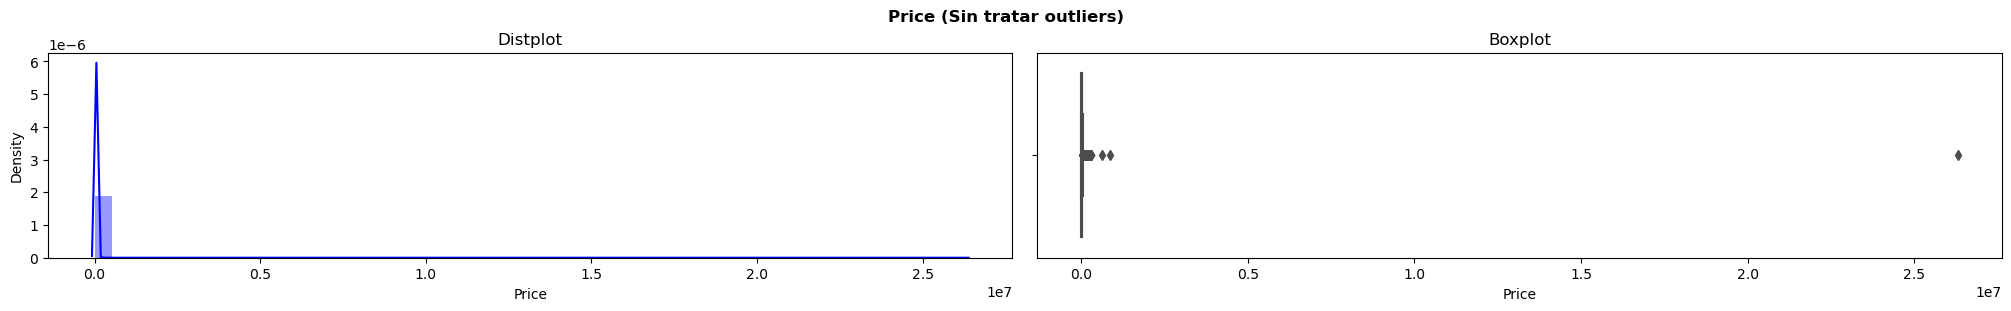

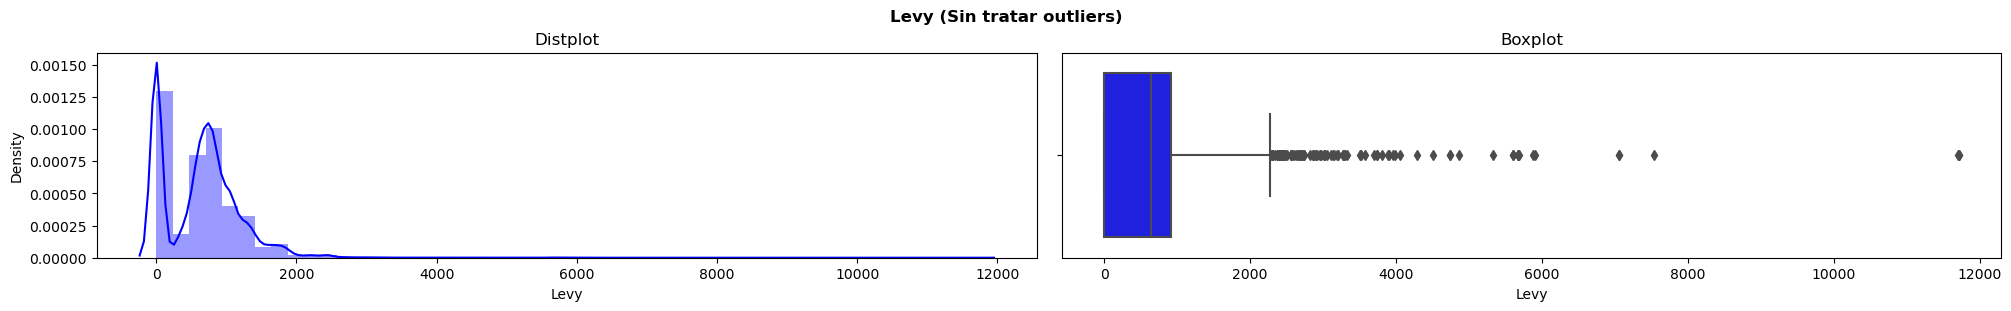

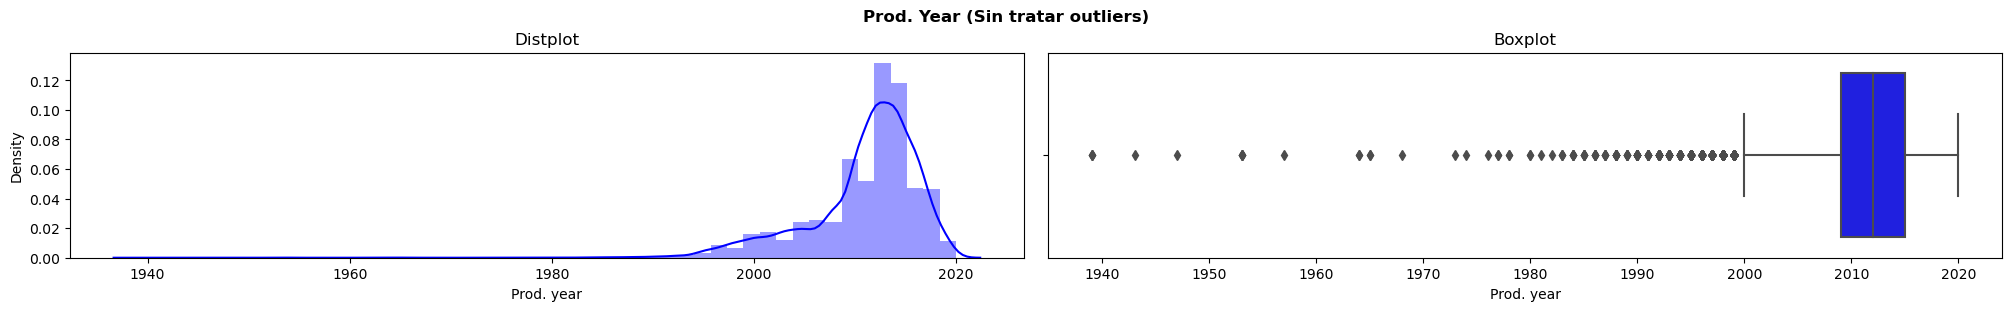

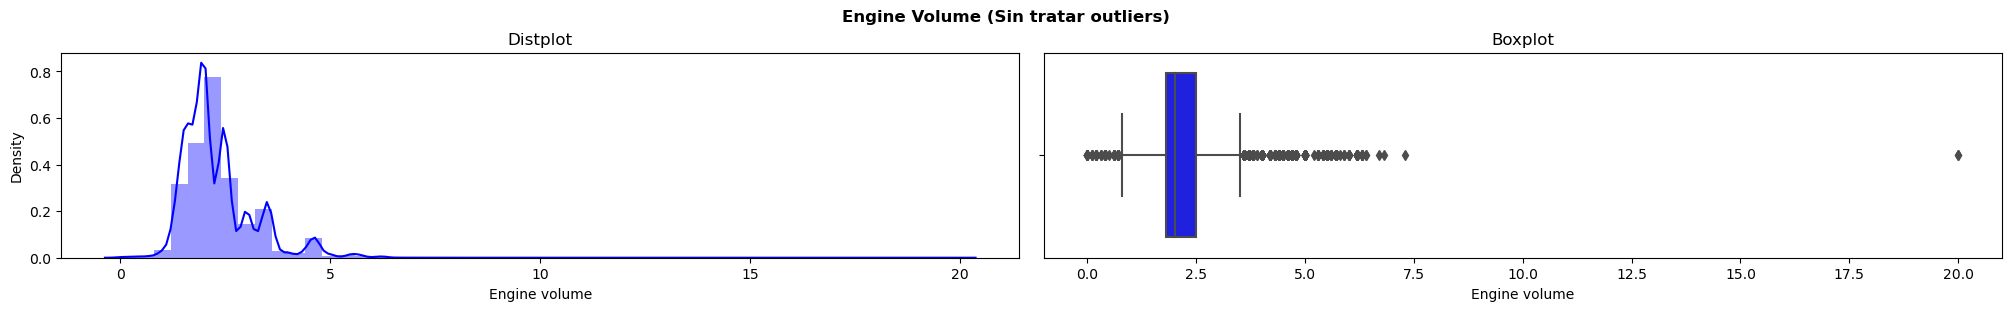

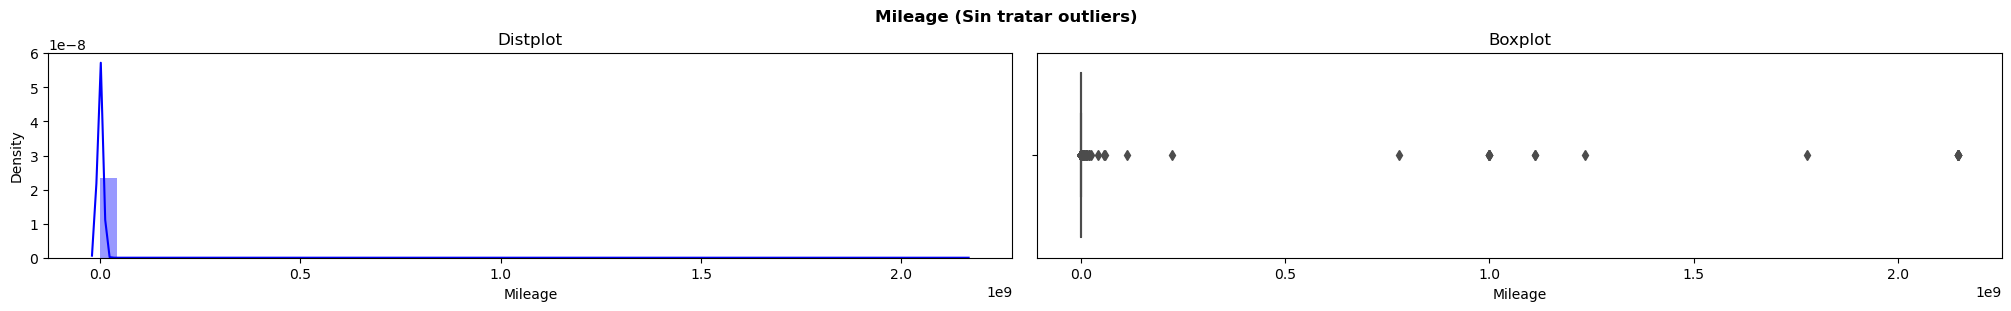

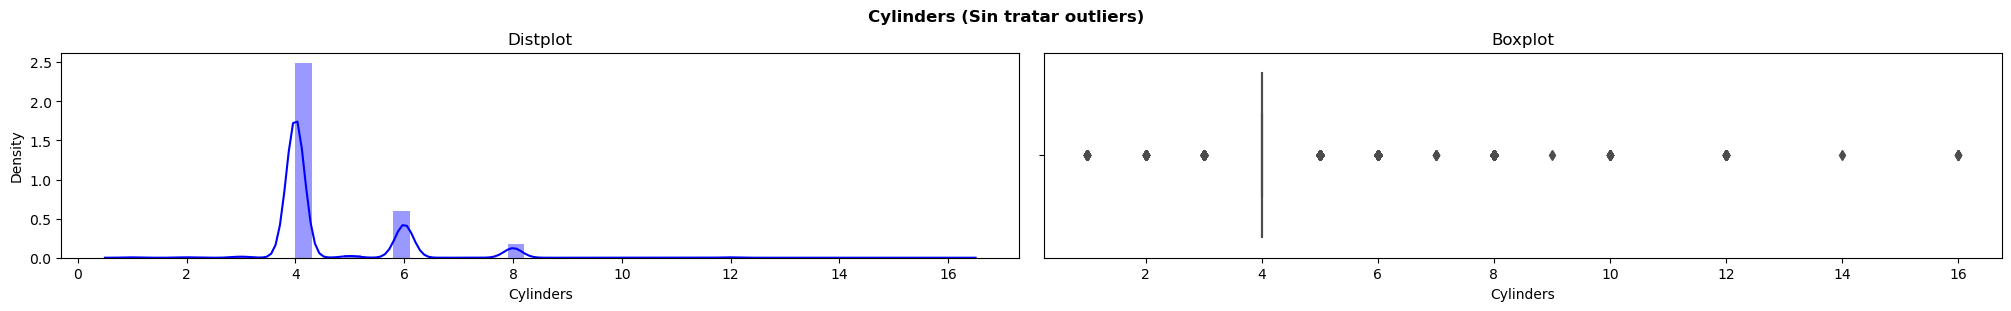

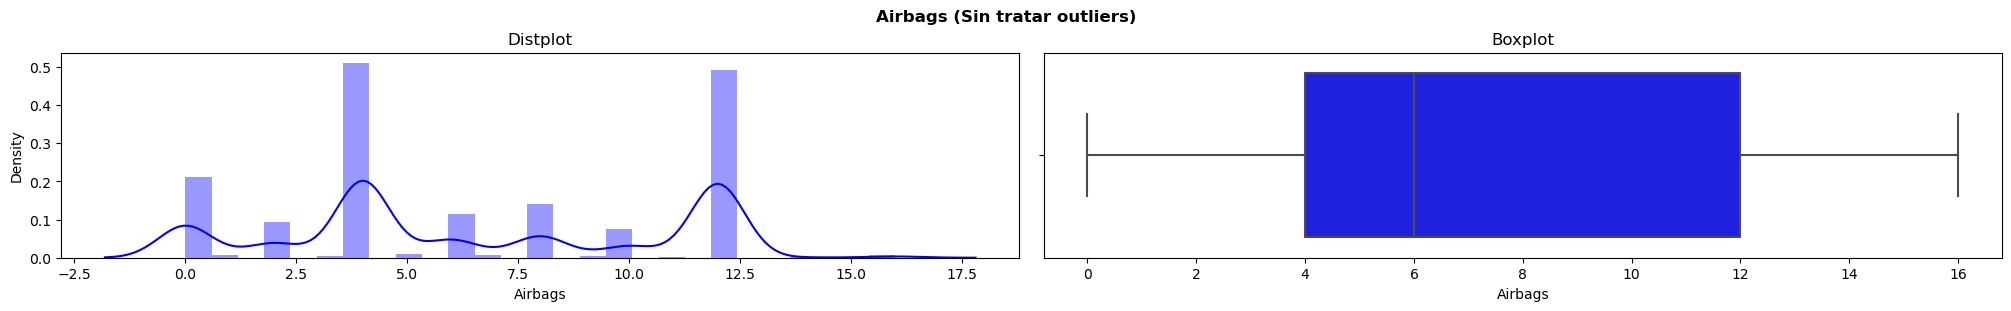

In [29]:
for col in columnas_numericas: 
    
    fig, ax = plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20,3)
    sns.distplot(autos3[col], ax=ax[0], color='blue').set(title='Distplot')
    sns.boxplot(autos3[col], ax=ax[1], color='blue', orient='h').set(title='Boxplot')
    plt.suptitle(f'{col.title()} (Sin tratar outliers)', weight='bold')
    fig.show()
    
# Se generan 2 gráficos para cada columna numérica, uno es para ver la distribución de los datos y el otro un boxplot

Se va a determinar la presencia de outliers en cada columna numérica.

In [30]:
df_num = autos3[columnas_numericas] # Se genera un nuevo dataset con las columnas numéricas

Q1_num = df_num.quantile(0.25) # Se obtiene el primer cuartil para cada columna
Q3_num = df_num.quantile(0.75) # Se obtiene el terer cuartil para cada columna
IQR_num = Q3_num - Q1_num # Se obtiene el rango intercuartílico

print('Las columnas tienen outliers?')

((df_num < Q1_num - 1.5*IQR_num) | (df_num > Q3_num + 1.5*IQR_num)).any() 
# Se analiza cada columna y devuelve True si hay al menos un registro que este fuera del rango intercualtílico 
# (presencia de outliers) o False si el caso es contrario (ausencia de outliers)

Las columnas tienen outliers?


Price             True
Levy              True
Prod. year        True
Engine volume     True
Mileage           True
Cylinders         True
Airbags          False
dtype: bool

Se va a determinar la cantidad de outliers en cada columna numérica.

In [29]:
def cantidad_outliers(data, col_list): # Se crea una función para detectar la cantidad de outliers
    for col_name in col_list:
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3 - q1
        limite_inf = q1-1.5*iqr
        limite_sup = q3+1.5*iqr
        outlier = ((data[col_name] < limite_inf) | (data[col_name] > limite_sup)).sum() # Suma la cantidad de casos que se consideran outliers
        print(f'La cantidad de outliers en {col_name} es {outlier}')
        
cantidad_outliers(autos3, columnas_numericas) # Se llama a la función para detectar la cantidad de outliers

La cantidad de outliers en Price es 1055
La cantidad de outliers en Levy es 160
La cantidad de outliers en Prod. year es 962
La cantidad de outliers en Engine volume es 1358
La cantidad de outliers en Mileage es 635
La cantidad de outliers en Cylinders es 4765
La cantidad de outliers en Airbags es 0


Se van a tratar los outliers en cada columna numérica.

In [31]:
def manejo_outliers(data, col_list): # Se crea una función para modificar el valor de los outliers detectados
    df_nuevo = data.copy() # Se hace una copia de dataset 
    for col_name in col_list:
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3 - q1
        limite_inf = q1-1.5*iqr
        limite_sup = q3+1.5*iqr
        df_nuevo.loc[:, col_name] = np.where(data[col_name] > limite_sup, limite_sup,
                                            np.where(data[col_name] < limite_inf, limite_inf,
                                                    data[col_name]))
        # Se llama a la función where que asigna el valor del límite superior en caso de outliers superiores al rango indicado
        # y el valor del límite inferior en caso de outliers inferiores al rango
        
    return df_nuevo # La función devuelve el dataset con los outliers tratados

autos3 = manejo_outliers(autos3, columnas_numericas) # Se llama a la función para el tratamiento de los outliers
autos3

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Manufacturer ID
0,13328.0,1399.0,LEXUS,RX 450,2010.0,Jeep,Yes,Hybrid,3.5,186005.0,4.0,Automatic,4x4,4,Left wheel,Silver,12.0,515.0
1,16621.0,1018.0,CHEVROLET,Equinox,2011.0,Jeep,No,Petrol,3.0,192000.0,4.0,Tiptronic,4x4,4,Left wheel,Black,8.0,467.0
2,8467.0,0.0,HONDA,FIT,2006.0,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2.0,474.0
3,3607.0,862.0,FORD,Escape,2011.0,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0.0,460.0
4,11726.0,446.0,HONDA,FIT,2014.0,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4.0,474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18919,8467.0,0.0,MERCEDES-BENZ,CLK 200,2000.0,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,2,Left wheel,Silver,5.0,449.0
18920,15681.0,831.0,HYUNDAI,Sonata,2011.0,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4,Left wheel,Red,8.0,498.0
18921,26108.0,836.0,HYUNDAI,Tucson,2010.0,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,4,Left wheel,Grey,4.0,498.0
18922,5331.0,1288.0,CHEVROLET,Captiva,2007.0,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,4,Left wheel,Black,4.0,467.0


Al tratar los valores atípicos, se cambio el tipo de dato de todas las columnas numéricas a float64.

In [32]:
autos3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18924 entries, 0 to 18923
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  float64
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  float64
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  float64
 9   Mileage           18924 non-null  float64
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  float6

Se va a modificar el tipo de dato de algunas columnas numéricas a int64.

In [33]:
autos3['Price'] = autos3['Price'].astype('int64') 
autos3['Levy'] = autos3['Levy'].astype('int64')
autos3['Prod. year'] = autos3['Prod. year'].astype('int64')
autos3['Mileage'] = autos3['Mileage'].astype('int64')
autos3['Cylinders'] = autos3['Cylinders'].astype('int64')
autos3['Airbags'] = autos3['Airbags'].astype('int64')

# Se cambia el tipo de dato de todas las columnas indicadas de float64 a int64

Se vuelven a mostrar los gráficos anteriores para ver como se modificó la distribución de datos al tratar los valores atípicos.

C:\Users\anav_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anav_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anav_\AppData\Local\Temp\ipykernel_15500\2871460019.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\anav_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` i

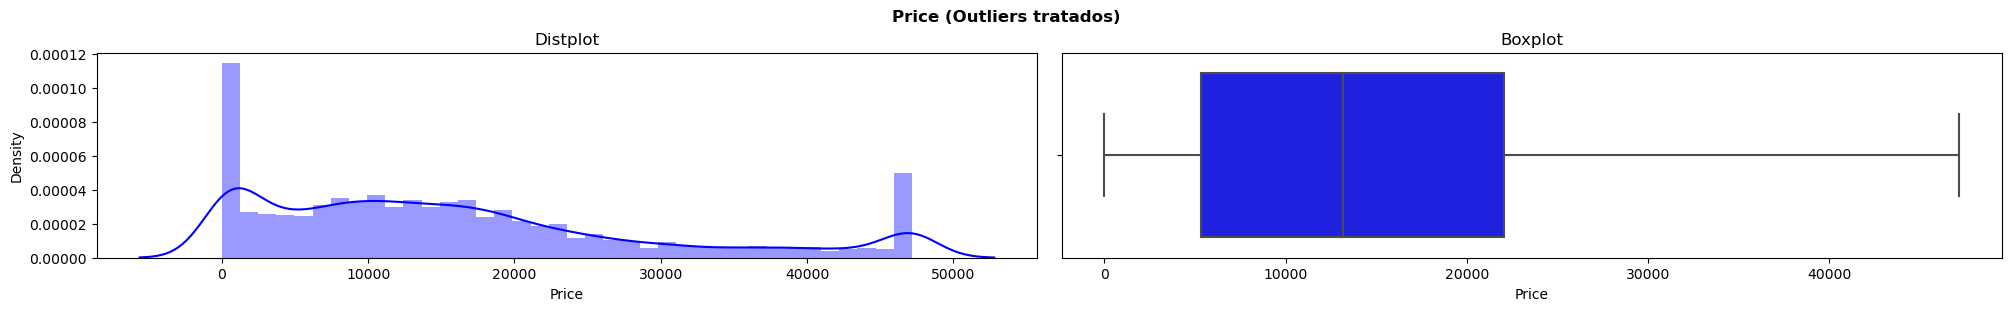

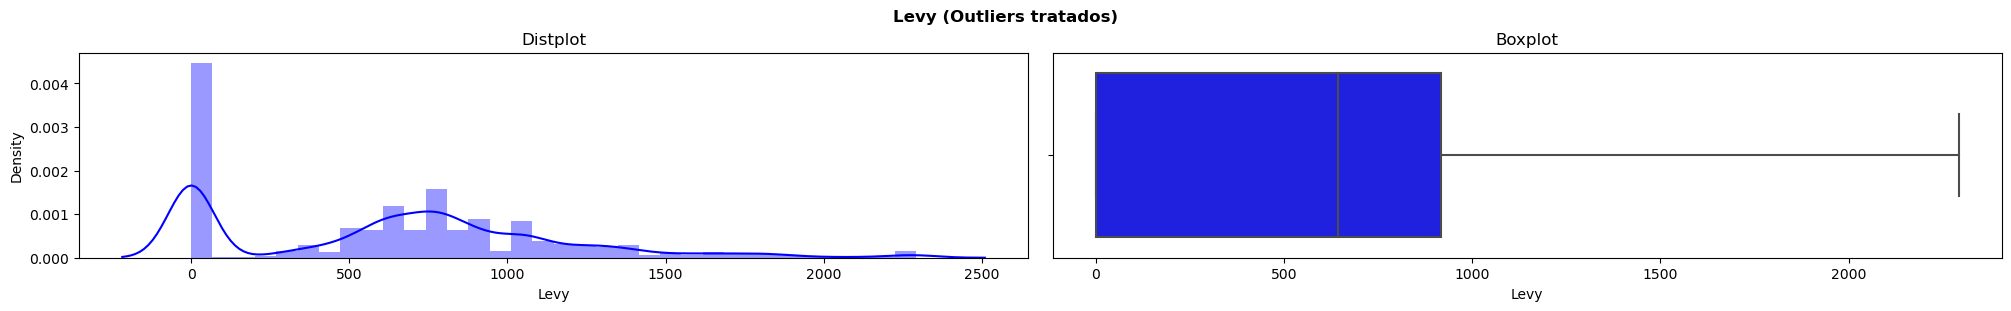

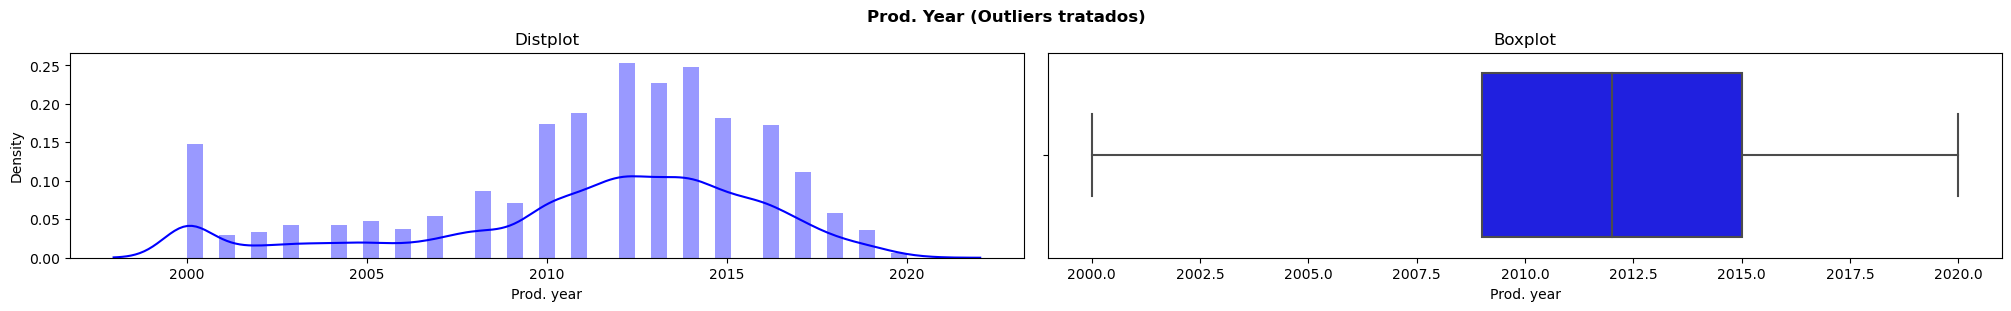

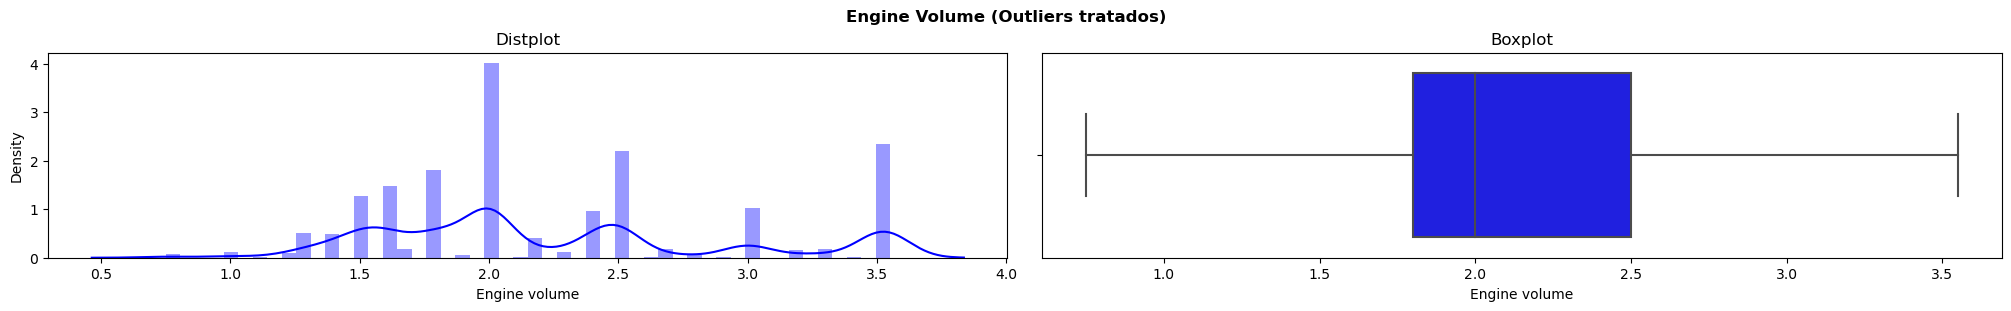

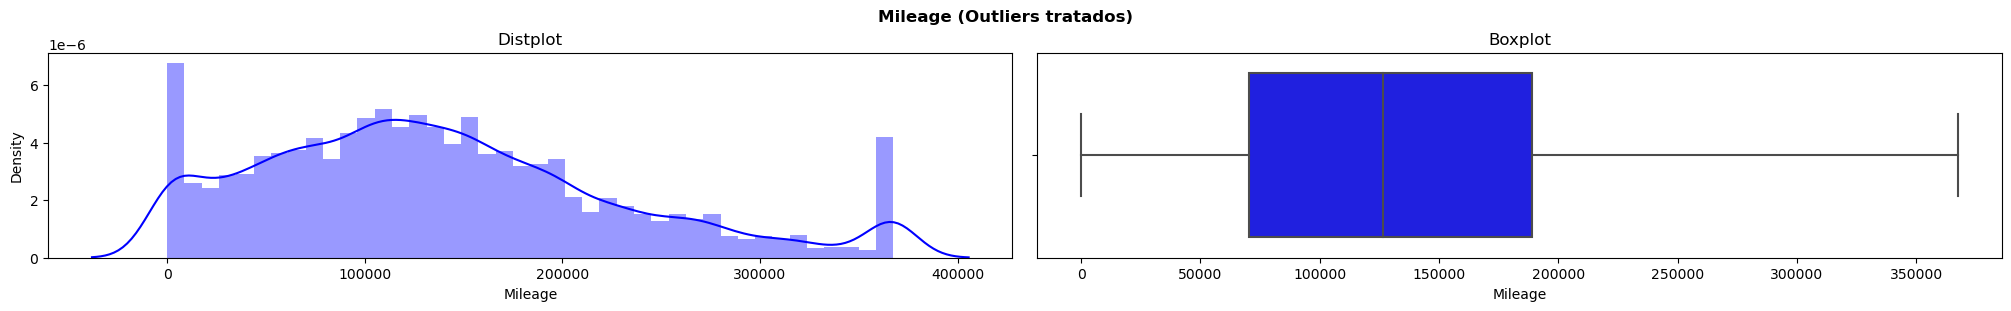

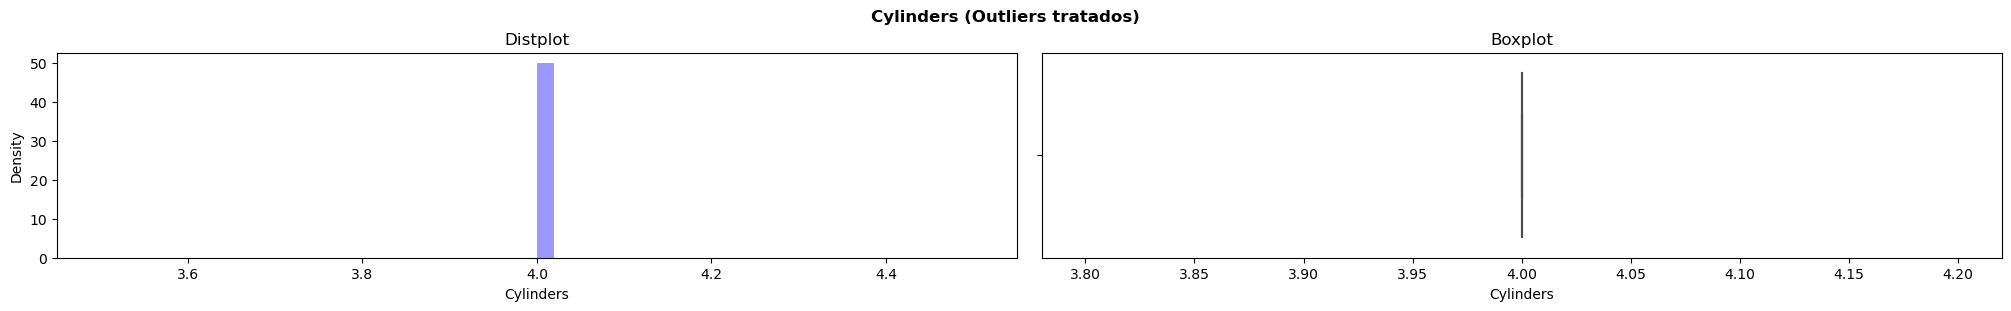

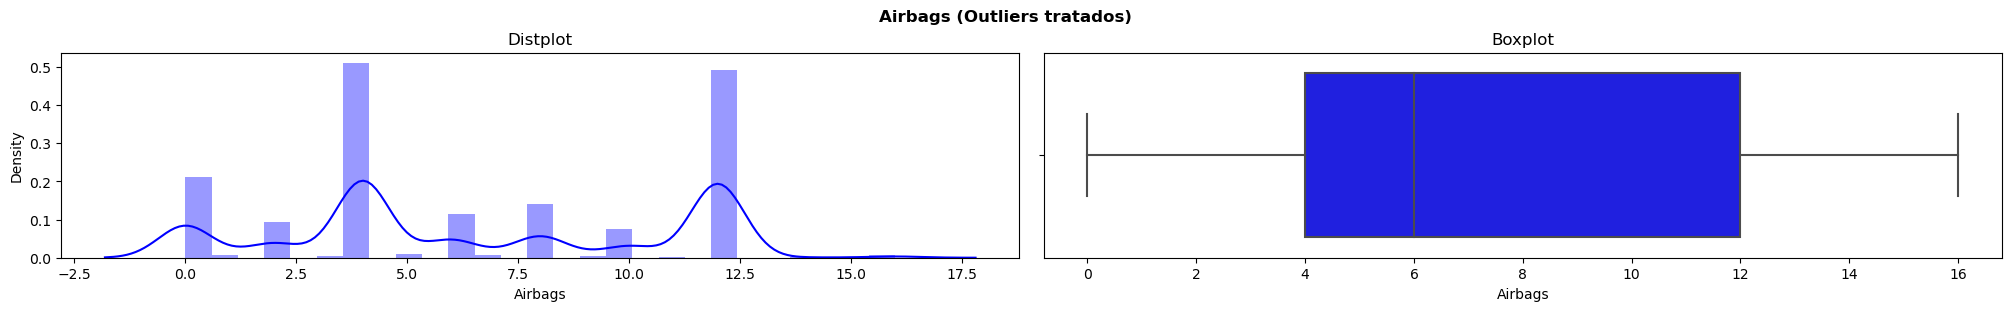

In [34]:
for col in columnas_numericas:
    
    fig, ax = plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20,3)
    sns.distplot(autos3[col], ax=ax[0], color='blue').set(title='Distplot')
    sns.boxplot(autos3[col], ax=ax[1], color='blue', orient='h').set(title='Boxplot')
    plt.suptitle(f'{col.title()} (Outliers tratados)', weight='bold')
    fig.show()

# Se generan los dos mismos gráficos para cada columna numérica, uno es para ver la distribución de los datos y el otro un boxplot con los outliers tratados

Del análisis de cada gráfica se puede ver que la columna "Cylinders" ya no tiene relevancia debido a que al tratar los outliers el valor en todos los registros es igual a 4, por lo tanto, se va a eliminar esta columna del dataset.

In [35]:
autos3 = autos3.drop(['Cylinders'], axis=1) # Se elimina la columna "Cylinders"

In [36]:
autos3.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Price,18924.0,15886.6,13420.8,1.0,5331.0,13172.0,22063.0,47161.0
Levy,18924.0,625.5,520.6,0.0,0.0,642.0,917.0,2292.0
Prod. year,18924.0,2011.1,4.9,2000.0,2009.0,2012.0,2015.0,2020.0
Engine volume,18924.0,2.2,0.7,0.8,1.8,2.0,2.5,3.6
Mileage,18924.0,137503.1,90883.2,0.0,70195.8,126400.0,189119.8,367505.0
Airbags,18924.0,6.6,4.3,0.0,4.0,6.0,12.0,16.0
Manufacturer ID,18328.0,484.1,208.6,440.0,449.0,471.0,498.0,10652.0


### Cambio de columnas categóricas a numéricas

Esta etapa se realiza debido a que posteriormente se va a ejecutar un modelo de regresión, esto implica contar con todas las columnas en formato numérico. Para cumplir con este objetivo se van a utilizar dos técnicas, 'One hot encoding' y 'Label encoder', preferiblemente es mejor utilizar la primera pero esto se devuelve desfavorable a medida que aumentan los distintos valores de cada columna. A continuación, se van a contar los valores distintos para todas las columnas categóricas.

In [37]:
def valores_distintos(x):
    a = 0
    for i in x:
        a += 1
    return a

# Función que devuelve la cantidad de valores únicos de cada columna categórica

In [38]:
manufacturer = autos3['Manufacturer'].unique()
valores_distintos(manufacturer)

# Se aplica la función "valores_distintos" a la columna manufacturer

65

In [39]:
model = autos3['Model'].unique()
valores_distintos(model)

# Se aplica la función "valores_distintos" a la columna model

1590

In [40]:
category = autos3['Category'].unique()
valores_distintos(category)

# Se aplica la función "valores_distintos" a la columna category

11

In [41]:
leather_interior = autos3['Leather interior'].unique()
valores_distintos(leather_interior)

# Se aplica la función "valores_distintos" a la columna leather interior

2

In [42]:
fuel_type = autos3['Fuel type'].unique()
valores_distintos(fuel_type)

# Se aplica la función "valores_distintos" a la columna fuel type

7

In [43]:
gear_box_type = autos3['Gear box type'].unique()
valores_distintos(gear_box_type)

# Se aplica la función "valores_distintos" a la columna gear box type

4

In [44]:
drive_wheels = autos3['Drive wheels'].unique()
valores_distintos(drive_wheels)

# Se aplica la función "valores_distintos" a la columna drive wheels

3

In [45]:
doors = autos3['Doors'].unique()
valores_distintos(doors)

# Se aplica la función "valores_distintos" a la columna doors

3

In [46]:
wheel = autos3['Wheel'].unique()
valores_distintos(wheel)

# Se aplica la función "valores_distintos" a la columna wheel

2

In [47]:
color = autos3['Color'].unique()
valores_distintos(color)

# Se aplica la función "valores_distintos" a la columna color

16

Dado que es preferible usar la técnica 'One hot encoding' en el caso en que se tengan pocos valores distintos en la columna, se decidió que si la columna tiene 5 o menos valores distintos se usa dicha técnica, caso contrario, se usa la técnica 'Label encoder'. Al aplicar esto, se obtiene la siguiente distribución de columnas:

* One hot encoding: 'Leather interior', 'Gear box type', 'Drive wheels', 'Doors' y 'Wheel'
* Label encoder: 'Manufacturer', 'Model', 'Category', 'Fuel type' y 'Color'

#### One hot encoding

In [48]:
autos4 = pd.get_dummies(autos3, columns=["Leather interior","Gear box type","Drive wheels","Doors","Wheel"])

# Se convierten las columnas indicadas a numéricas mediante la técnica "One hot encoding" 

#### Label encoder

In [49]:
encoder = LabelEncoder()
autos4['Manufacturer'] = encoder.fit_transform(autos4['Manufacturer'])
autos4['Model'] = encoder.fit_transform(autos4['Model'])
autos4['Category'] = encoder.fit_transform(autos4['Category'])
autos4['Fuel type'] = encoder.fit_transform(autos4['Fuel type'])
autos4['Color'] = encoder.fit_transform(autos4['Color'])

# Se convierten las columnas indicadas a numéricas mediante la técnica "Label encoder" 

### Normalización del dataset

En esta etapa se va a realizar la normalización de todo el dataset para dejarlo en condiciones óptimas para realizar el modelo. De esta forma, el modelado no se ve alterado por las distintas unidades de medida en cada columna.

In [50]:
for col in autos4.columns:
    autos4[col] = (autos4[col]-autos4[col].min())/(autos4[col].max()-autos4[col].min())

### Dataset final

In [51]:
autos4 # Se muestra el dataset final

,Price,Levy,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Color,...,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_2,Doors_4,Doors_>5,Wheel_Left wheel,Wheel_Right-hand drive
0,0.282591,0.610384,0.500000,0.781624,0.50,0.4,0.333333,0.982143,0.506129,0.800000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.352417,0.444154,0.125000,0.414097,0.55,0.4,0.833333,0.803571,0.522442,0.066667,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.179517,0.000000,0.328125,0.430459,0.30,0.3,0.833333,0.196429,0.544210,0.066667,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.076463,0.376091,0.250000,0.415985,0.55,0.4,0.333333,0.625000,0.459765,0.933333,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.248622,0.194590,0.328125,0.430459,0.70,0.3,0.833333,0.196429,0.250067,0.800000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18919,0.179517,0.000000,0.562500,0.242291,0.00,0.1,0.000000,0.446429,0.816315,0.800000,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
18920,0.332485,0.362565,0.359375,0.839522,0.55,0.9,0.833333,0.589286,0.439722,0.733333,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
18921,0.553584,0.364747,0.359375,0.907489,0.50,0.4,0.166667,0.446429,0.316635,0.466667,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
18922,0.113020,0.561955,0.125000,0.286973,0.35,0.4,0.166667,0.446429,0.139476,0.066667,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


Se obtuvo el dataset final aplicando data wrangling. Cabe destacar que el dataset "autos3" es el que se va a utilizar para el análisis exploratorio de datos (EDA) mientras que el dataset "autos4" es el que se va a utilizar para realizar el modelo.

## Análisis exploratorio de datos

#### Pregunta 1: Distribución de la variable de interés (Precio)

Se van a graficar los datos de la variable de interés en un histograma y también, se van a calcular algunos parámetros estadísticos.

Text(0, 0.5, 'Precio (USD)')

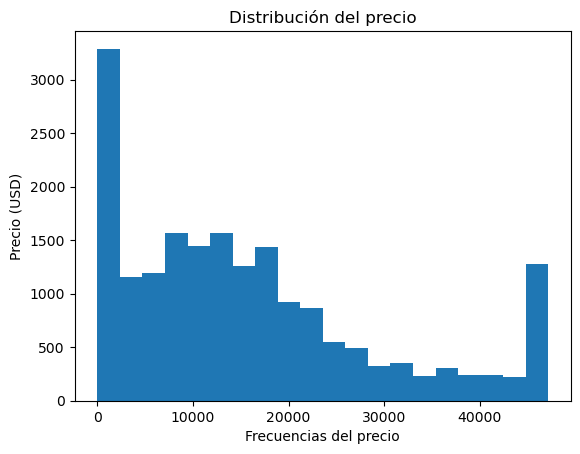

In [52]:
fig, ax = plt.subplots()
ax.hist(autos3['Price'], bins=20)
ax.set_title('Distribución del precio')
ax.set_xlabel('Frecuencias del precio')
ax.set_ylabel('Precio (USD)')

# Se genera un histogramos para la columna "Price"

#### Resúmenes estadísticos de la columna 'Price'

In [53]:
media = autos3['Price'].mean()
print('Media: ', media)
data = autos3['Price']
mediana = data.quantile(q=0.5)
print('Mediana: ', mediana)
Q1 = data.quantile(q=0.25)
print('Q1: ', Q1)
Q3 = data.quantile(q=0.75)
print('Q3: ',Q3)
minimo = autos3['Price'].min()
print('El valor mínimo es:', minimo)
maximo = autos3['Price'].max()
print('El valor máximo es:', maximo)

# Análisis estadístico para la columna "Price"

Media:  15886.559659691397
Mediana:  13172.0
Q1:  5331.0
Q3:  22063.0
El valor mínimo es: 1
El valor máximo es: 47161


#### Pregunta 2: Existe relación lineal entre la variable "Price" y las variables "Levy", "Prod. year", "Engine volume", "Mileage" y "Airbags"

Se va a crear un nuevo dataset con las columnas numéricas para hacer un análisis de correlación entre las distintas variables en un heatmap y un pairplot.

In [54]:
df2 = pd.DataFrame(autos3, columns=('Price','Levy','Prod. year','Mileage','Engine volume','Airbags'))
df2

# Se crea un dataframe nuevo con las columnas numéricas

,Price,Levy,Prod. year,Mileage,Engine volume,Airbags
0,13328,1399,2010,186005,3.5,12
1,16621,1018,2011,192000,3.0,8
2,8467,0,2006,200000,1.3,2
3,3607,862,2011,168966,2.5,0
4,11726,446,2014,91901,1.3,4
...,...,...,...,...,...,...
18919,8467,0,2000,300000,2.0,5
18920,15681,831,2011,161600,2.4,8
18921,26108,836,2010,116365,2.0,4
18922,5331,1288,2007,51258,2.0,4


In [55]:
df2.corr()

# Se aplica el método de correlación

,Price,Levy,Prod. year,Mileage,Engine volume,Airbags
Price,1.000000,0.040314,0.335778,-0.229407,0.083192,-0.052877
Levy,0.040314,1.000000,0.428950,-0.013911,0.356930,0.131660
Prod. year,0.335778,0.428950,1.000000,-0.262751,-0.040573,0.224001
Mileage,-0.229407,-0.013911,-0.262751,1.000000,0.162076,-0.028335
Engine volume,0.083192,0.356930,-0.040573,0.162076,1.000000,0.272689
Airbags,-0.052877,0.131660,0.224001,-0.028335,0.272689,1.000000


Text(0.5, 1.0, 'Dependencia lineal entre variables numéricas')

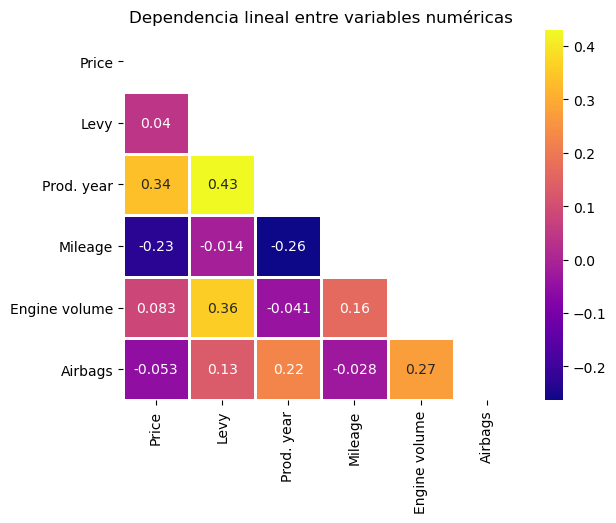

In [56]:
fig, ax = plt.subplots()
mask2 = np.triu(np.ones_like(df2.corr(), dtype=bool)) # Crea una máscara para que en el gráfico solo se vean las casillas debajo de la diagonal
ax = sns.heatmap(data=df2.corr(), mask=mask2, annot=True, lw=1, cmap='plasma')
ax.set_title('Dependencia lineal entre variables numéricas')

# Se genera un mapa de calor donde se muestra que tan fuerte es la relación lineal entre las variables

<Figure size 768x576 with 0 Axes>

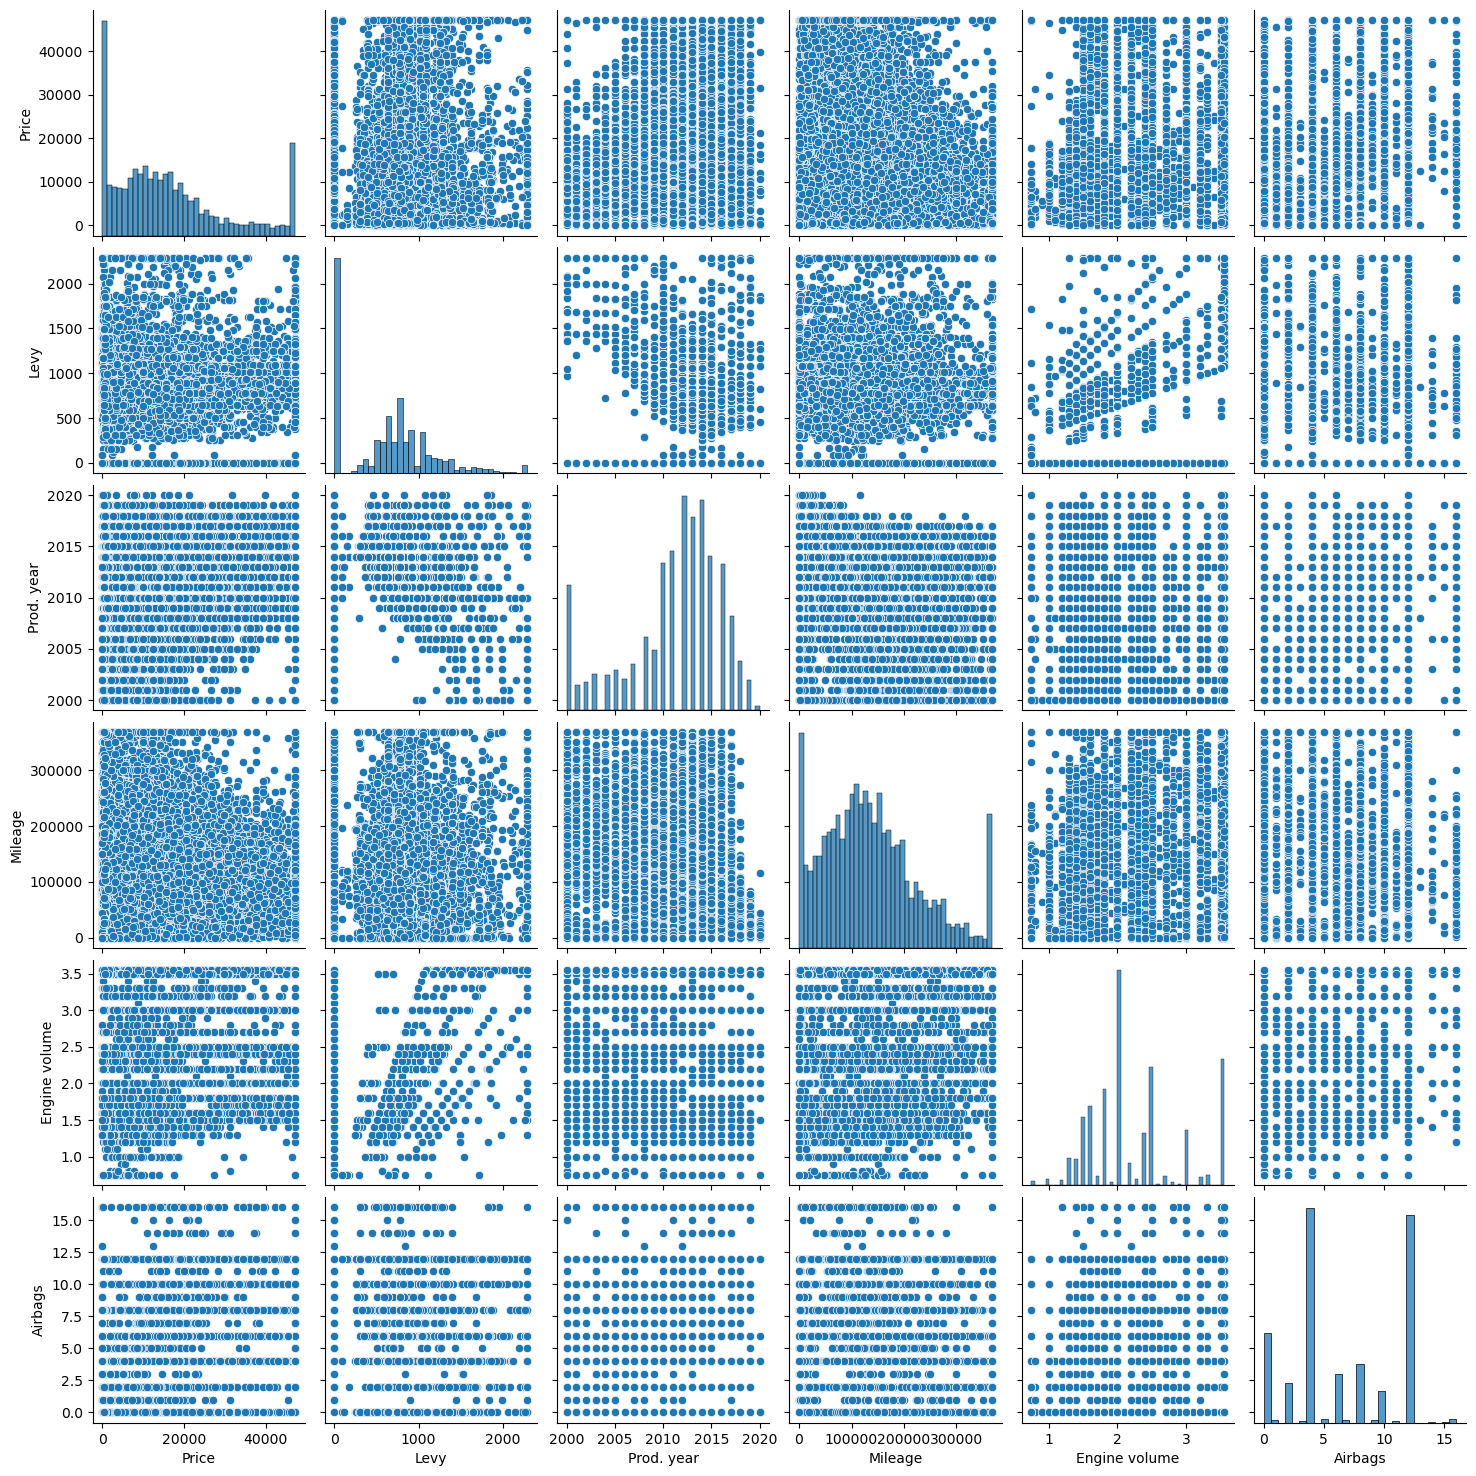

In [57]:
plt.figure(dpi=120)
sns.pairplot(df2)
plt.show()

#### Pregunta 3: Cuales son los 10 fabricantes con autos más caros y cuales son los 10 fabricantes con autos más baratos

Para determinar los fabricantes con los autos más caros y más baratos se van a agrupar los precios de los autos por fabricantes y se va a calcular la media de los mismos para luego representarlos en dos gráficos de barras.

In [58]:
fabricantes = autos3.groupby('Manufacturer')['Price'].mean().round(1) # Se agrupan los datos según el fabricante y se informa la media del precio
fabricantes = fabricantes.sort_values(ascending=False) # Se le da un orden descendente
fabricantes

Manufacturer
ASTON MARTIN    47161.0
TESLA           47161.0
BENTLEY         47161.0
LAMBORGHINI     47161.0
FERRARI         39574.5
                 ...   
VAZ              4659.9
MOSKVICH         4609.0
ZAZ              3822.5
ROVER            2433.3
ROLLS-ROYCE       178.5
Name: Price, Length: 65, dtype: float64

#### Los 10 fabricantes con la media del precio mas alta 

In [59]:
fabricantes.head(10).round(1) # Se muestran las primeras 10 filas

Manufacturer
ASTON MARTIN    47161.0
TESLA           47161.0
BENTLEY         47161.0
LAMBORGHINI     47161.0
FERRARI         39574.5
LAND ROVER      32275.4
SSANGYONG       30572.9
PORSCHE         28643.2
HUMMER          28098.4
JEEP            23029.2
Name: Price, dtype: float64

Text(0, 0.5, 'Precio (USD)')

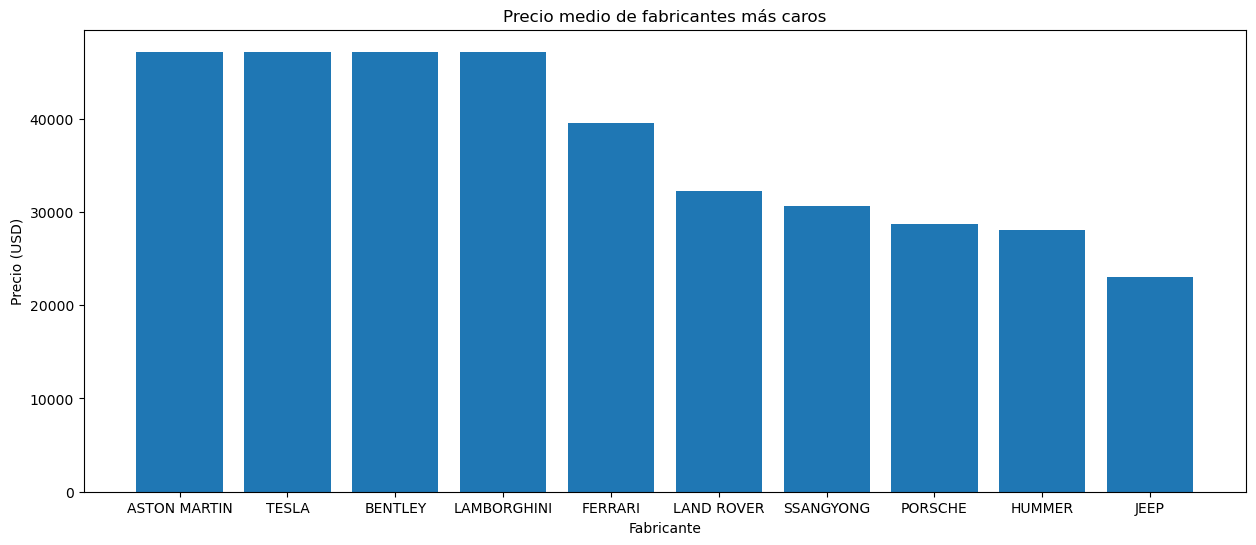

In [60]:
plt.figure(figsize=(15,6))
plt.bar(fabricantes.index[:10], fabricantes.values[:10])
plt.title('Precio medio de fabricantes más caros')
plt.xlabel('Fabricante')
plt.ylabel('Precio (USD)')

# Se genera un gráfico de barras con los 10 fabricantes más caros

#### Los 10 fabricantes con la media del precio mas baja

In [61]:
fabricantes.tail(10).round(1) # Se muestran las últimas 10 filas

Manufacturer
PONTIAC        6600.0
ACURA          5910.9
DAIHATSU       5402.8
UAZ            5290.8
SEAT           4829.5
VAZ            4659.9
MOSKVICH       4609.0
ZAZ            3822.5
ROVER          2433.3
ROLLS-ROYCE     178.5
Name: Price, dtype: float64

Text(0, 0.5, 'Precio (USD)')

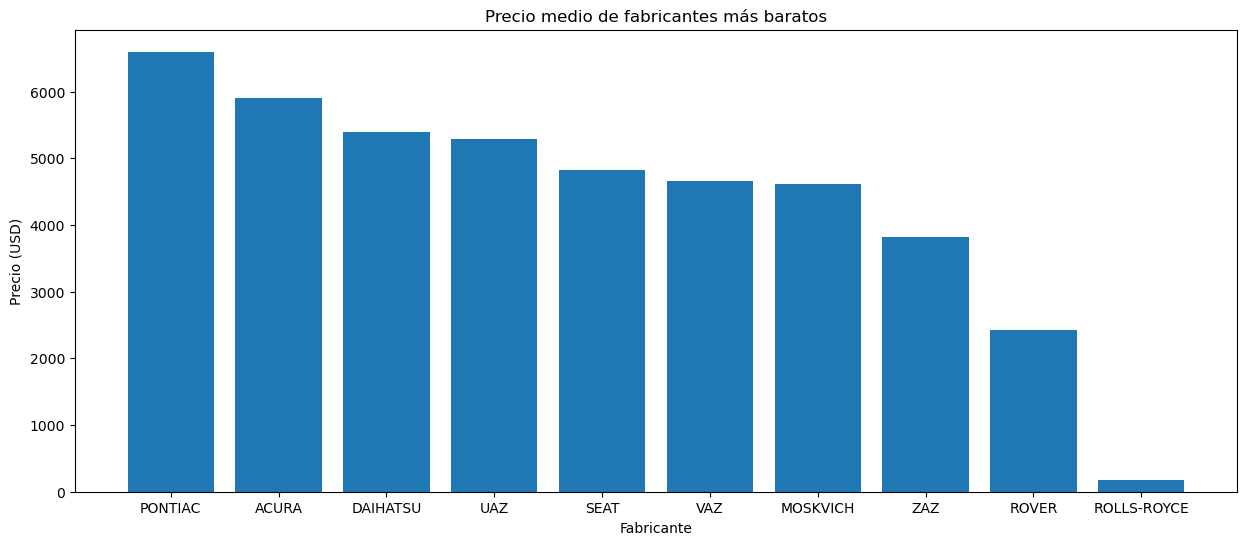

In [62]:
plt.figure(figsize=(15,6))
plt.bar(fabricantes.index[-10:],fabricantes.values[-10:])
plt.title('Precio medio de fabricantes más baratos')
plt.xlabel('Fabricante')
plt.ylabel('Precio (USD)')

# Se genera un gráfico de barras con los 10 fabricantes más baratos

#### Pregunta 4: Cual es el precio de los autos según su tipo y que tipo de auto es el más frecuente

Para determinar un precio representativo para cada tipo de auto se va a agrupar el precio de los autos por el tipo y se va a calcular la media, estos datos se los va a representar en un gráfico de barras. Además, para obtener que auto tiene una mayor frecuencia se va a agrupar a los autos por tipo y se va a hacer un conteo para luego representarlos en un gráfico de torta.

In [63]:
categoria = autos3.groupby('Category')['Price'].mean().round(0) # Se agrupan los datos según la categoría y se informa la media del precio
categoria

Category
Cabriolet      21144.0
Coupe          17754.0
Goods wagon     9920.0
Hatchback      11274.0
Jeep           20931.0
Limousine      11534.0
Microbus       17815.0
Minivan        20123.0
Pickup         23398.0
Sedan          13570.0
Universal      22260.0
Name: Price, dtype: float64

Text(0, 0.5, 'Precio (USD)')

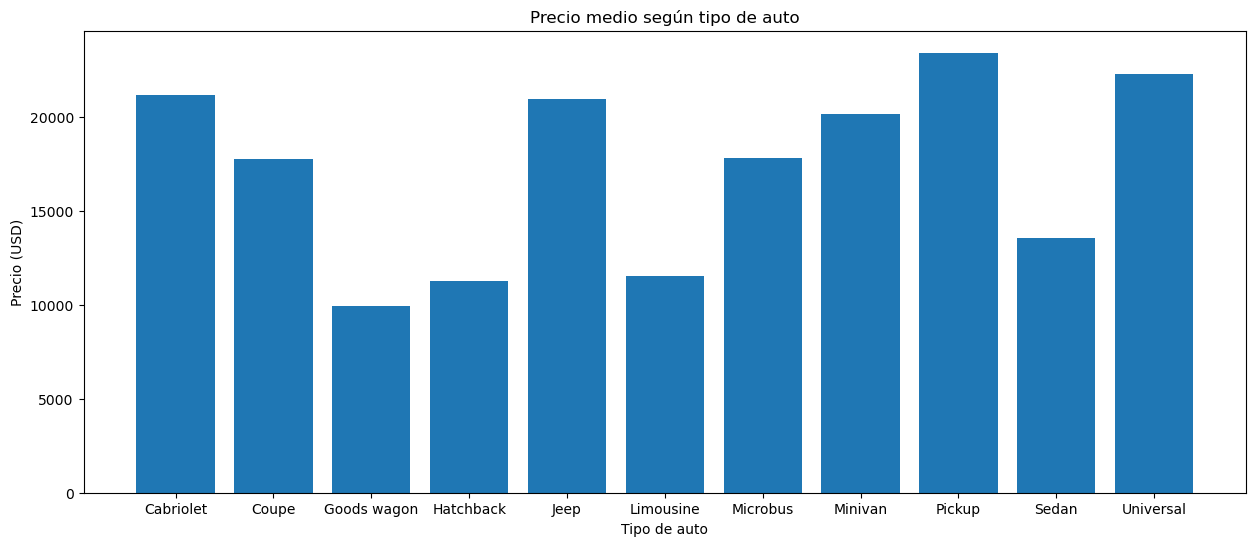

In [64]:
plt.figure(figsize=(15,6))
plt.bar(categoria.index, categoria.values)
plt.title('Precio medio según tipo de auto')
plt.xlabel('Tipo de auto')
plt.ylabel('Precio (USD)')

# Se realiza un gráfico de barras donde se informa la media para cada categoría

In [65]:
categoria2 = autos3.groupby('Category')['Price'].count() # Se agrupan los datos según la categoría y se informa el conteo de casos
categoria2

Category
Cabriolet        35
Coupe           528
Goods wagon     229
Hatchback      2799
Jeep           5378
Limousine        11
Microbus        299
Minivan         633
Pickup           51
Sedan          8600
Universal       361
Name: Price, dtype: int64

Text(0.5, 1.0, 'Frecuencia del tipo de auto')

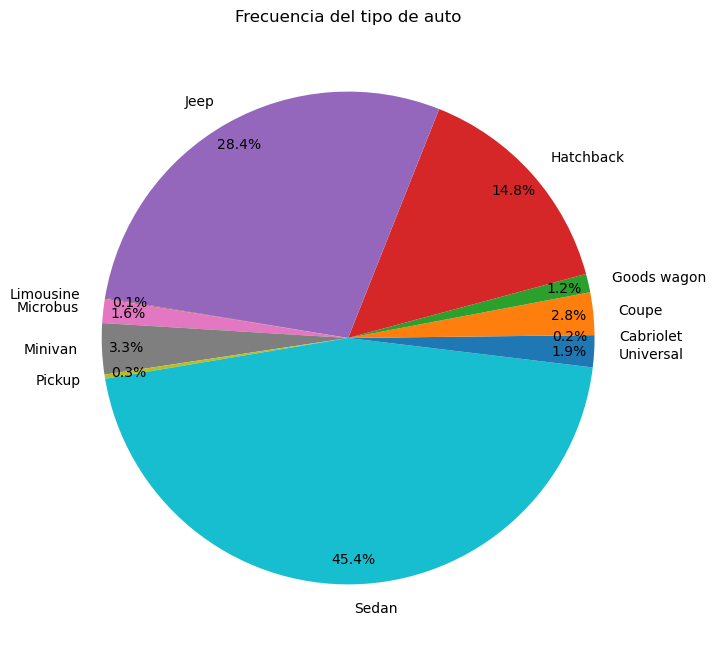

In [66]:
plt.figure(figsize=(8,8))
plt.pie(categoria2, labels=categoria2.index, autopct="%0.1f%%", pctdistance=0.9)
plt.title('Frecuencia del tipo de auto')

# Se genera un gráfico de torta para ver la frecuencia del tipo de auto

#### Pregunta 5: Como es la distribución de precios según el tipo de combustible que tiene cada auto 

Se va a hacer un histograma del precio para cada tipo de combustible y se va a realizar un análisis estadístico

[Text(0.5, 0, 'Tipo de combustible'),
 Text(0, 0.5, 'Precio (USD)'),
 Text(0.5, 1.0, 'Distribución del Precio vs Tipo de combustible')]

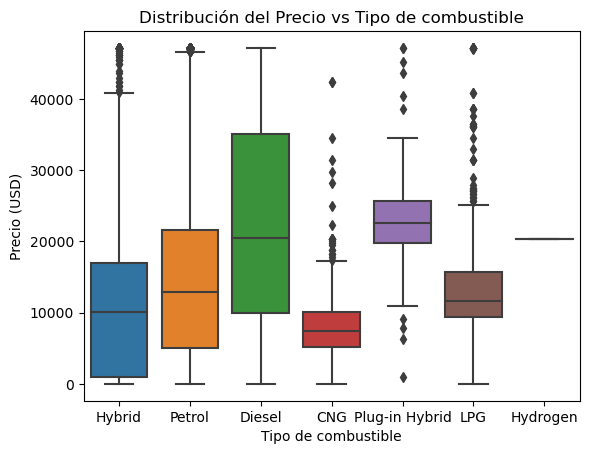

In [67]:
ax = sns.boxplot(x='Fuel type', y = 'Price', data = autos3) 
ax.set(xlabel='Tipo de combustible', ylabel='Precio (USD)', title='Distribución del Precio vs Tipo de combustible')

# Se genera un boxplot del precio para cada tipo de combustible

#### Resúmenes estadisticos para cada tipo de combustible

In [68]:
comb1 = autos3[autos3['Fuel type'] == 'Hybrid']
comb2 = autos3[autos3['Fuel type'] == 'Petrol']
comb3 = autos3[autos3['Fuel type'] == 'Diesel']
comb4 = autos3[autos3['Fuel type'] == 'CNG']
comb5 = autos3[autos3['Fuel type'] == 'Plug-in Hybrid']
comb6 = autos3[autos3['Fuel type'] == 'LPG']
comb_1 = comb1['Price']
comb_2 = comb2['Price']
comb_3 = comb3['Price']
comb_4 = comb4['Price']
comb_5 = comb5['Price']
comb_6 = comb6['Price']
mediana_comb1 = comb_1.quantile(q=0.5)
print("Mediana Hybrid: ", mediana_comb1)
mediana_comb2 = comb_2.quantile(q=0.5)
print("Mediana Petrol: ", mediana_comb2)
mediana_comb3 = comb_3.quantile(q=0.5)
print("Mediana Diesel: ", mediana_comb3)
mediana_comb4 = comb_4.quantile(q=0.5)
print("Mediana CNG: ", mediana_comb4)
mediana_comb5 = comb_5.quantile(q=0.5)
print("Mediana Plug-in Hybrid: ", mediana_comb5)
mediana_comb6 = comb_6.quantile(q=0.5)
print("Mediana LPG: ", mediana_comb6)

# Análisis estadístico para cada tipo de combustible

Mediana Hybrid:  10036.0
Mediana Petrol:  12890.0
Mediana Diesel:  20438.0
Mediana CNG:  7370.0
Mediana Plug-in Hybrid:  22580.0
Mediana LPG:  11604.0


#### Pregunta 6: Como afecta las ruedas motrices y el tipo de caja de cambios al precio

Se va a crear un nuevo dataframe al agrupar la media del precio por el tipo de caja de cambios y las ruedas motrices. Después, se van a graficar estos datos en 4 gráficos de barras. Por último, se genera una tabla contingencia entre estas dos variables para ver la cantidad de casos en cada uno.

In [69]:
caracteristicas = pd.DataFrame({'Media': autos3.groupby(['Gear box type','Drive wheels'])['Price'].mean().round(0)}) # Se crea un dataframa en donde se agrupan los datos según el tipo de caja y la rueda motriz y se informa la media del precio
caracteristicas = caracteristicas.reset_index() # Se resetea el índice
caracteristicas

,Gear box type,Drive wheels,Media
0,Automatic,4x4,12362.0
1,Automatic,Front,16240.0
2,Automatic,Rear,11155.0
3,Manual,4x4,15074.0
4,Manual,Front,9140.0
5,Manual,Rear,13144.0
6,Tiptronic,4x4,27942.0
7,Tiptronic,Front,18605.0
8,Tiptronic,Rear,23023.0
9,Variator,4x4,21043.0


C:\Users\anav_\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


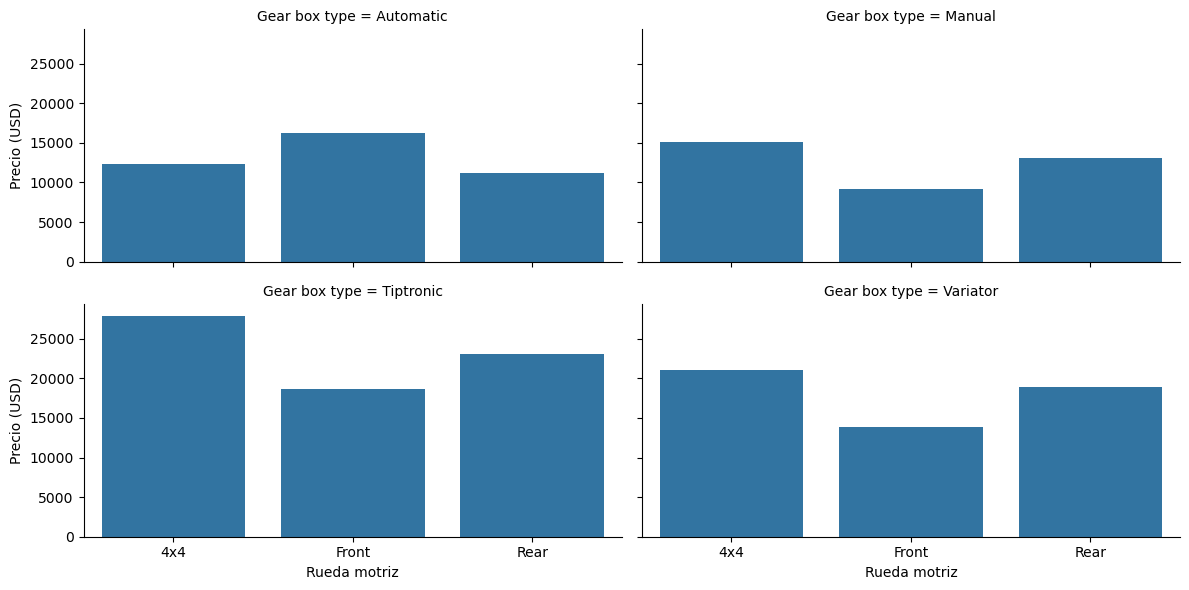

In [82]:
chart = sns.FacetGrid(caracteristicas, col='Gear box type', margin_titles=True, col_wrap=2, aspect=2, row_order=caracteristicas['Gear box type'].unique)
chart.map(sns.barplot, 'Drive wheels', 'Media',)
chart.set_xlabels('Rueda motriz')
chart.set_ylabels('Precio (USD)')

# Se generan 4 gráficos de barras, en cada gráfico hay un tipo de caja y se informa la media del precio para cada rueda motriz

In [71]:
pd.crosstab(autos3['Gear box type'], autos3['Drive wheels'])

Drive wheels,4x4,Front,Rear
Gear box type,,,
Automatic,2791,9632,859
Manual,211,968,665
Tiptronic,904,1431,730
Variator,63,664,6


#### Hipótesis 1: Hay más autos con interior de cuero y a su vez, tienen una media mayor en el precio

Se va a agrupar a los autos por si tiene interior de cuero o no, se va a calcular la media y el conteo en cada caso y se va a graficar la frecuencia de aparición en el dataset.

In [72]:
interior = autos3.groupby('Leather interior')['Price'].count() # Se agrupan los datos según el interior de cuero y se informa la cantidad de casos
interior

Leather interior
No      5193
Yes    13731
Name: Price, dtype: int64

Text(0.5, 1.0, 'Proporción de autos con y sin interior de cuero')

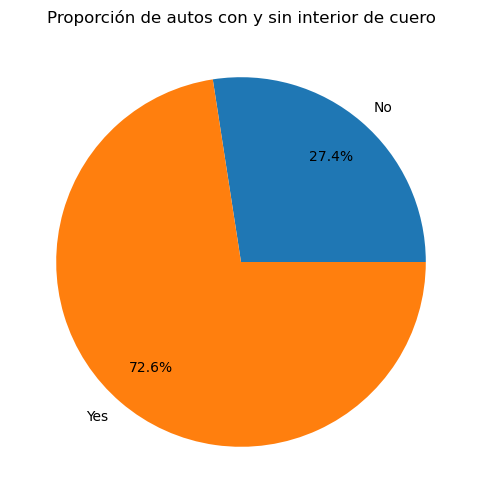

In [73]:
plt.figure(figsize=(6,6))
plt.pie(interior, labels=interior.index, autopct="%0.1f%%", pctdistance=0.75)
plt.title('Proporción de autos con y sin interior de cuero')

# Se genera un gráfico de torta donde se muestra la proporción de autos con y sin interior de cuero

In [74]:
interior1 = autos3[autos3['Leather interior'] == 'Yes']
interior2 = autos3[autos3['Leather interior'] == 'No']
mediana_cuero = interior1['Price'].median()
mediana_no_cuero = interior2['Price'].median()
print("Mediana con interior de cuero: ", mediana_cuero)
print("Mediana sin interior de cuero: ", mediana_no_cuero)

# Análisis estadístico para el precio y el interior de cuero

Mediana con interior de cuero:  14113.0
Mediana sin interior de cuero:  11604.0


#### Hipótesis 2: Al aumentar la cantidad de puertas el precio de los autos aumenta y también, la cantidad de puertas en los autos con mayor frecuencia es 4

Se va a agrupar por la cantidad de puertas, se va a calcular la media y el conteo en cada caso y se va a graficar la frecuencia de casos en el dataset.

In [75]:
puertas = autos3.groupby('Doors')['Price'].count() # Se agrupan los datos según la cantidad de puertas y se informa la cantidad de casos
puertas

Doors
2       768
4     18032
>5      124
Name: Price, dtype: int64

Text(0.5, 1.0, 'Proporción de autos según cantidad de puertas')

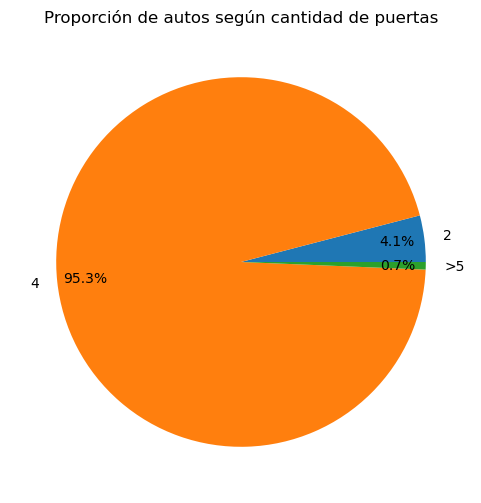

In [76]:
plt.figure(figsize=(6,6))
plt.pie(puertas, labels=puertas.index, autopct="%0.1f%%", pctdistance=0.85)
plt.title('Proporción de autos según cantidad de puertas')

# Se genera un gráfico de torta donde se muestra la proporción de autos según la cantidad de puertas

In [77]:
puerta_2 = autos3[autos3['Doors'] == '2']
puerta_4 = autos3[autos3['Doors'] == '4']
puerta_5 = autos3[autos3['Doors'] == '>5']
mediana_puerta_2 = puerta_2['Price'].median()
mediana_puerta_4 = puerta_4['Price'].median()
mediana_puerta_5 = puerta_5['Price'].median()
print("Mediana con 2 puertas: ", mediana_puerta_2)
print("Mediana con 4 puertas: ", mediana_puerta_4)
print("Mediana con más de 5 puertas: ", mediana_puerta_5)

# Análisis estadístico para el precio y la cantidad de puertas

Mediana con 2 puertas:  10976.0
Mediana con 4 puertas:  13172.0
Mediana con más de 5 puertas:  14583.0


#### Hipótesis 3: El color del auto no modifica el precio de los mismos

Se va a agrupar por el color de los autos calculando la media del precio de cada uno y se van a representar los datos en un gráfico de barras.

In [78]:
color = autos3.groupby('Color')['Price'].mean().round(0) # Se agrupan los datos según el color y se informa la media del precio
color

Color
Beige            15282.0
Black            16688.0
Blue             14239.0
Brown            17899.0
Carnelian red    15348.0
Golden           14328.0
Green             9262.0
Grey             17791.0
Orange           12154.0
Pink             10377.0
Purple            8837.0
Red              13241.0
Silver           14707.0
Sky blue         14036.0
White            16637.0
Yellow           18818.0
Name: Price, dtype: float64

[Text(0.5, 0, 'Color'),
 Text(0, 0.5, 'Precio (USD)'),
 Text(0.5, 1.0, 'Media del precio según el color')]

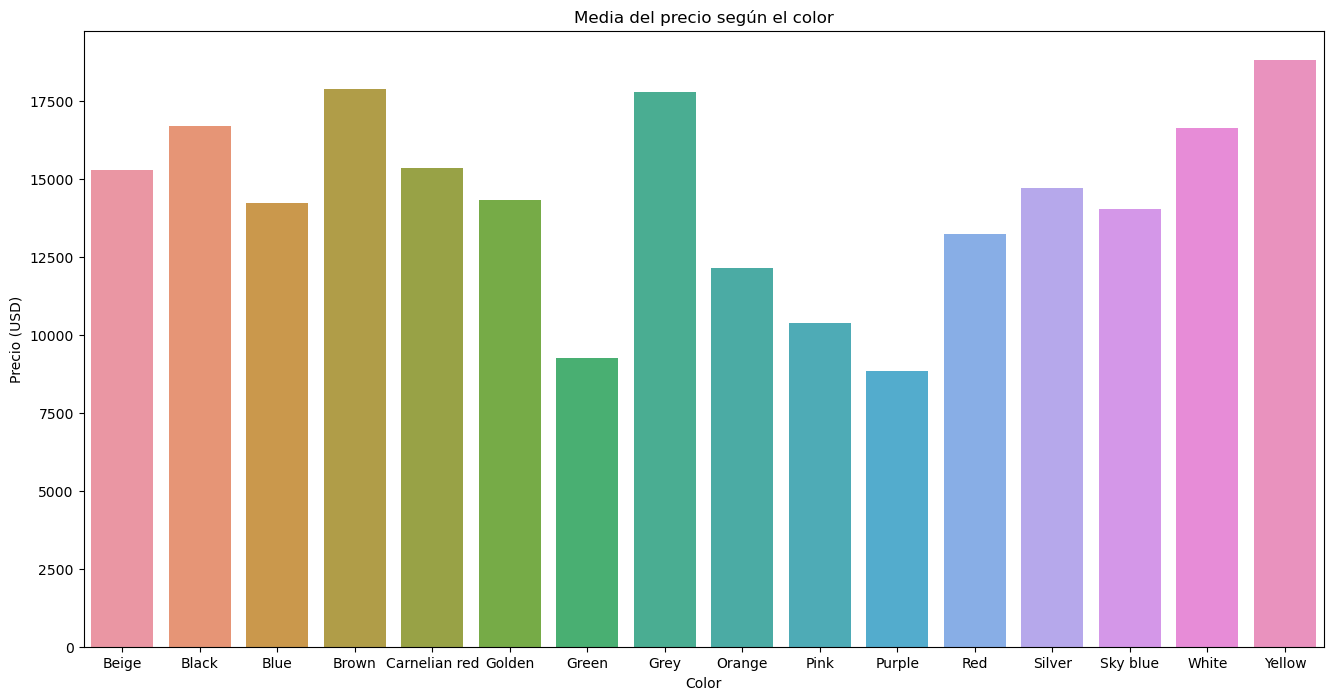

In [79]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x=color.index, y=color.values)
ax.set(xlabel='Color', ylabel='Precio (USD)', title='Media del precio según el color')

# Se genera un gráfico de barras donde se muestra la media del precio según el color

#### Hipótesis 4: El precio de los autos aumenta mientras más nuevo sea (mayor año de producción)

Se va a agrupar por el año de producción de los autos y la media del precio de los mismos creando un nuevo dataframe. Finalmente, se va a realizar un gráfico de lineas entre la media del precio por año y el año.

In [80]:
años = pd.DataFrame({'Media': autos3.groupby('Prod. year')['Price'].mean().round(0)}) # Se genera un dataframe en donde se agrupan los datos según el año de producción y se informa la media del precio
años = años.reset_index() # Se resetea el índice
años

,Prod. year,Media
0,2000,7155.0
1,2001,8527.0
2,2002,9162.0
3,2003,9660.0
4,2004,11206.0
5,2005,10778.0
6,2006,12912.0
7,2007,12999.0
8,2008,11249.0
9,2009,13485.0


Text(0, 0.5, 'Precio (USD)')

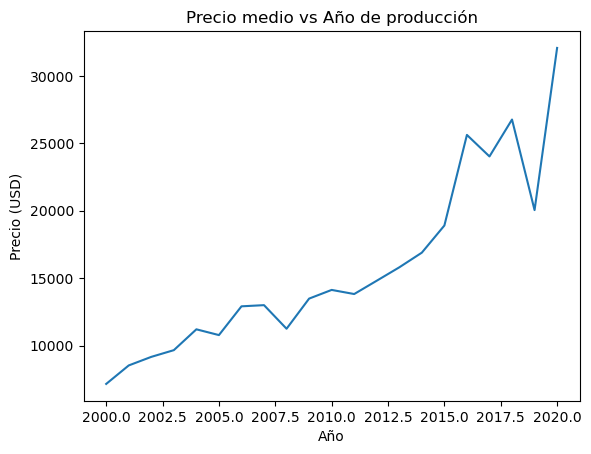

In [81]:
x = años['Prod. year']
y = años['Media']

fig,ax = plt.subplots()
ax.plot(x, y, label= 'Precio medio')
ax.set_title('Precio medio vs Año de producción')
ax.set_xlabel('Año')
ax.set_ylabel('Precio (USD)')

# Se realiza un gráfico de líneas en donde se informa la media del precio para cada año de producción

### Insights

#### Pregunta 1

Se realizó un histograma de 20 bins para la variable "Precio" y se encontró que la distribución es asimétrica con un sesgo positivo. A su vez, esta asimetría positiva se ve reflejada en el valor de la mediana y la media, dado que es mayor la media (15887 USD) que la mediana (13172 USD) tal como ocurre en estos casos.

#### Pregunta 2

Analizando el precio de los autos, se puede decir que no tiene una dependencia lineal fuerte con ninguna otra variable, la relación más importante se da con el año de producción (R2 = 0.34, relación positiva) seguida por los impuestos (R2 = -0.23, relación inversa).

#### Pregunta 3

Fabricantes más caros: ASTON MARTIN - TESLA - BENTLEY - LAMBORGHINI - FERRARI - LAND ROVER - SSANGYONG - PORSCHE - HUMMER - JEEP

Fabricantes más baratos: PONTIAC - ACURA - DAIHATSU - UAZ - SEAT - VAZ - MOSKVICH - ZAZ - ROVER - ROLLS-ROYCE

Estas observaciones no son concluyentes ya que el precio de los autos depende de un montón de variables que puede que no se vean totalmente reflejadas en el dataset. De todas formas, es una buena aproximación para conocer a cada fabricante. 

#### Pregunta 4

En el gráfico de barras se pueden ver que las categorías "Pickup" y "Universal" son las que tienen una media mayor del precio, mientras que las categorías "Goods wagon", "Hatchback" y "Limousine" son las que tienen una media menor del precio. Además, se hizo un conteo para cada categoría con el motivo de descubrir qué valores de la media son los más confiables (se asumió que mientras mayor sea el número de casos más confiable es el valor de la media debido a que es más representativa), por lo tanto, gracias al gráfico de torta se llega a la conclusión de que las medias de las categorías "Hatchback", "Jeep" y "Sedan" son las más confiables, mientras que las menos confiables son las de las categorías "Cabriolet", "Limousine" y "Pickup".

#### Pregunta 5

Se aprecia claramente que dependiendo del tipo de combustible, el precio varía si nos basamos en la mediana. Es factible descartar el combustible "Hydrogen" debido a que hay un solo registro en todo el dataset. Por lo tanto, si nos basamos en la mediana de mayor a menor el orden es: "Plug-in Hybrid", "Diesel", "Petrol", "LPG", "Hybrid" y "CGN". A su vez, los valores de los precios para el "CGN", "Plug-in Hybrid" y "LPG" están concentrados cerca de la mediana ya que los cuartiles 1 y 3 se encuentran a poco distancia de la misma por lo que no hay una gran variación en el precio de los mismos, caso contrario para el "Hybrid", "Diesel" y "Petrol".

#### Pregunta 6

Se llega a la conclusión de que no hay un patrón exactamente definido que relacione el tipo de caja de cambio, las ruedas motrices y el precio ya que no hay una rueda motriz que sea superior o inferior a las demás en todas los tipos de caja de cambios. Se podría decir que el tipo de rueda motriz que tiene una mayor media es "4x4" ya que esta es mayor para los tipos de cajas "Manual", "Tiptronic" y "Variator". En cuanto a los tipos de rueda motriz "Front" y "Rear" se puede concluir que la media media es superior para el tipo "Rear" ya que esta es mayor para los tipos de cajas "Manual", "Tiptronic" y "Variator". Por otra parte, se podría decir que los tipos de caja de cambios "Tiptronic" y "Variator" son las de mayor media del precio, mientras que "Automatic" y "Manual" tienen una media del precio menor. Por último, de la tabla de contingencia entre estas dos variables se puede ver que los casos más frecuentes son los de caja de cambios "Automatic" y tipo de rueda motriz "Front".

#### Hipótesis 1

Se comprueba la hipótesis planteada, hay más autos con interior de cuero y la media del precio es mayor para los autos de este tipo.

#### Hipótesis 2

Se comprueba la hipótesis planteada previamente, la cantidad de puertas más frecuente es 4 y al aumentar la cantidad de puertas, el precio de los autos aumenta.

#### Hipótesis 3

En este caso, no se puede afirmar ni descartar la hipótesis planteada ya que se ve que hay una variación en el precio según el color pero es necesario calcular qué tan grande es la misma, además, esta variación puede que se adjudique a otras características de los autos.

#### Hipótesis 4

Se podría decir que esta hipótesis es cierta. Se puede ver que, a pesar de que en algunos años el precio disminuye, la tendencia general de la evolución del precio con el tiempo es creciente. 